<a href="https://colab.research.google.com/github/vinilvadakkepurakkal/Track/blob/master/behaviour_cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!git clone https://github.com/vinilvadakkepurakkal/Track.git

fatal: destination path 'Track' already exists and is not an empty directory.


In [22]:
!ls


sample_data  Track


In [23]:
!ls Track

driving_log.csv  IMG  README.md


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Convolution2D, Flatten, MaxPooling2D
import random
import cv2
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import ntpath

In [114]:
datadir = 'Track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names= columns )
#data = pd.read_csv(('driving_log.csv'), names= columns )
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\center_2019_01_09_17_22_44_588.jpg,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\left_2019_01_09_17_22_44_588.jpg,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\right_2019_01_09_17_22_44_588.jpg,0.0,0.0,0.0,0.000078
1,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\center_2019_01_09_17_22_44_692.jpg,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\left_2019_01_09_17_22_44_692.jpg,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\right_2019_01_09_17_22_44_692.jpg,0.0,0.0,0.0,0.000079
2,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\center_2019_01_09_17_22_44_792.jpg,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\left_2019_01_09_17_22_44_792.jpg,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\right_2019_01_09_17_22_44_792.jpg,0.0,0.0,0.0,0.000080
3,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\center_2019_01_09_17_22_44_894.jpg,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\left_2019_01_09_17_22_44_894.jpg,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\right_2019_01_09_17_22_44_894.jpg,0.0,0.0,0.0,0.000079
4,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\center_2019_01_09_17_22_44_994.jpg,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\left_2019_01_09_17_22_44_994.jpg,C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\right_2019_01_09_17_22_44_994.jpg,0.0,0.0,0.0,0.000078


In [115]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_01_09_17_22_44_588.jpg,left_2019_01_09_17_22_44_588.jpg,right_2019_01_09_17_22_44_588.jpg,0.0,0.0,0.0,0.000078
1,center_2019_01_09_17_22_44_692.jpg,left_2019_01_09_17_22_44_692.jpg,right_2019_01_09_17_22_44_692.jpg,0.0,0.0,0.0,0.000079
2,center_2019_01_09_17_22_44_792.jpg,left_2019_01_09_17_22_44_792.jpg,right_2019_01_09_17_22_44_792.jpg,0.0,0.0,0.0,0.000080
3,center_2019_01_09_17_22_44_894.jpg,left_2019_01_09_17_22_44_894.jpg,right_2019_01_09_17_22_44_894.jpg,0.0,0.0,0.0,0.000079
4,center_2019_01_09_17_22_44_994.jpg,left_2019_01_09_17_22_44_994.jpg,right_2019_01_09_17_22_44_994.jpg,0.0,0.0,0.0,0.000078


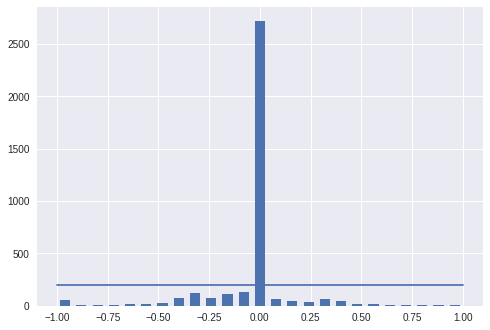

In [116]:
num_bins = 25
samples_per_bin= 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist , width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin , samples_per_bin))

total data: 3698
removed: 2520
remaining 1178


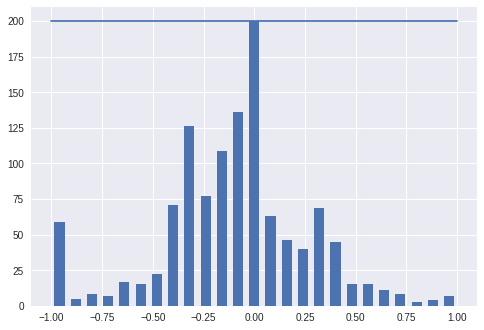

In [117]:
print ('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
    
print ("removed:", len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining', len(data))
hist , _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist , width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin , samples_per_bin))

In [118]:
print(data.iloc[1])

center      center_2019_01_09_17_22_45_094.jpg
left        left_2019_01_09_17_22_45_094.jpg  
right       right_2019_01_09_17_22_45_094.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       7.87468e-05                       
Name: 5, dtype: object


In [0]:
def load_image_steering(datadir, df):
  image_path=[]
  steering=[]
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths , steerings

image_paths , steerings = load_image_steering(datadir +'/IMG' , data)

In [120]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print ('Training samples : {}\nValidation samples: {}'.format(len(X_train), len(X_valid)))

Training samples : 942
Validation samples: 236


Text(0.5,1,'Validation set')

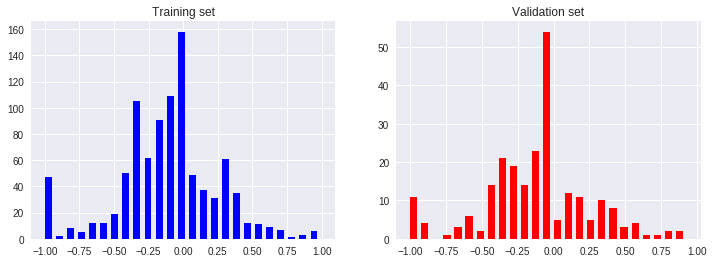

In [121]:
fig, axis = plt.subplots(1,2 , figsize=(12,4))
axis[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axis[0].set_title('Training set')
axis[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axis[1].set_title('Validation set')

In [0]:
def image_preprocessing(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img ,(200,66))
  img = img/255
  return img

Text(0.5,1,'preprocessed Image')

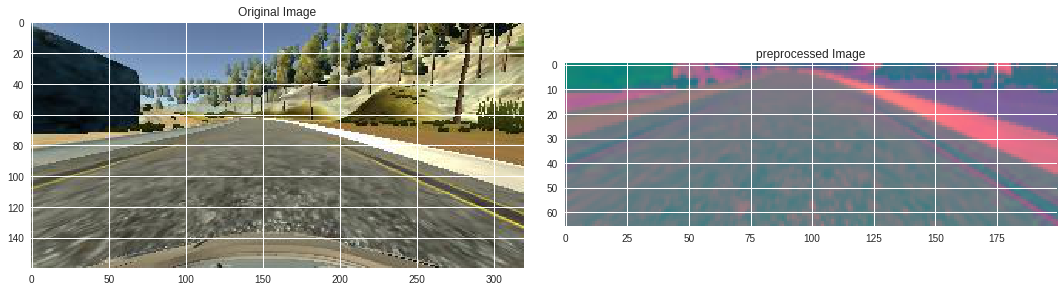

In [123]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = image_preprocessing(image)

fig, axs = plt.subplots(1,2 , figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('preprocessed Image')


In [0]:
X_train = np.array(list(map(image_preprocessing , X_train)))
X_valid = np.array(list(map(image_preprocessing , X_valid)))

(942, 66, 200, 3)


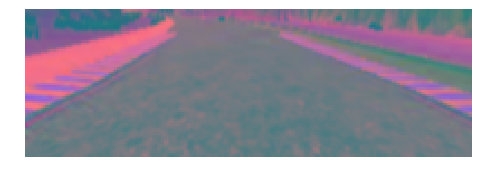

In [125]:
plt.imshow(X_train[np.random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24,5,5, subsample=(2,2), input_shape=(66,200,3), activation='elu'))
  model.add(Convolution2D(36,5,5, subsample=(2,2), activation='elu'))
  model.add(Convolution2D(48,5,5, subsample=(2,2), activation='elu'))
  model.add(Convolution2D(64,3,3, activation='elu'))
  model.add(Convolution2D(64,3,3, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [141]:
model = nvidia_model()
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), act

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)              0         
__________

In [142]:
h = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Train on 942 samples, validate on 236 samples
Epoch 1/30
942/942 [==============================] - 1s 2ms/step - loss: 1.2243 - val_loss: 0.1510
Epoch 2/30
942/942 [==============================] - 1s 682us/step - loss: 0.3597 - val_loss: 0.1338
Epoch 3/30
942/942 [==============================] - 1s 671us/step - loss: 0.2406 - val_loss: 0.1321
Epoch 4/30
942/942 [==============================] - 1s 669us/step - loss: 0.1821 - val_loss: 0.1292
Epoch 5/30
942/942 [==============================] - 1s 658us/step - loss: 0.1559 - val_loss: 0.1255
Epoch 6/30
942/942 [==============================] - 1s 643us/step - loss: 0.1433 - val_loss: 0.1232
Epoch 7/30
942/942 [==============================] - 1s 643us/step - loss: 0.1535 - val_loss: 0.1237
Epoch 8/30
942/942 [==============================] - 1s 654us/step - loss: 0.1286 - val_loss: 0.1206
Epoch 9/30
942/942 [==============================] - 1s 644us/step - loss: 0.1321 - val_loss: 0.1140
Epoch 10/30
942/942 [=================

Text(0.5,0,'epochs')

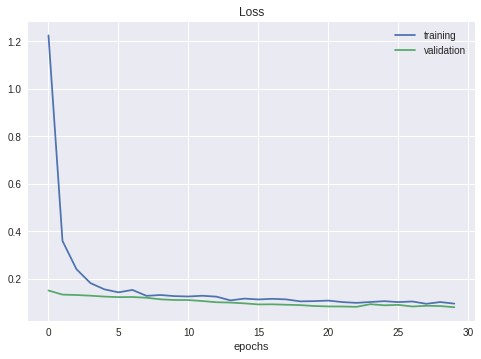

In [143]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel("epochs")

In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')